# Reducing the number of high fatality accidents

## 📖 Background
You work for the road safety team within the department of transport and are looking into how they can reduce the number of major incidents. The safety team classes major incidents as fatal accidents involving 3+ casualties. They are trying to learn more about the characteristics of these major incidents so they can brainstorm interventions that could lower the number of deaths. They have asked for your assistance with answering a number of questions.

## 💾 The data
The reporting department have been collecting data on every accident that is reported. They've included this along with a lookup file for 2020's accidents.

*Published by the department for transport. https://data.gov.uk/dataset/road-accidents-safety-data* 
*Contains public sector information licensed under the Open Government Licence v3.0.*

In [118]:
import pandas as pd
accidents = pd.read_csv(r'./data/accident-data.csv')
accidents.head()

,accident_index,accident_year,accident_reference,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,...,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area
0,2020010219808,2020,10219808,-0.254001,51.462262,3,1,1,04/02/2020,3,...,6,0,9,9,1,9,9,0,0,1
1,2020010220496,2020,10220496,-0.139253,51.470327,3,1,2,27/04/2020,2,...,6,0,0,4,1,1,1,0,0,1
2,2020010228005,2020,10228005,-0.178719,51.529614,3,1,1,01/01/2020,4,...,6,0,0,0,4,1,2,0,0,1
3,2020010228006,2020,10228006,-0.001683,51.541210,2,1,1,01/01/2020,4,...,6,0,0,4,4,1,1,0,0,1
4,2020010228011,2020,10228011,-0.137592,51.515704,3,1,2,01/01/2020,4,...,5,0,0,0,4,1,1,0,0,1


In [119]:
lookup = pd.read_csv(r'./data/road-safety-lookups.csv')
lookup.head()

,table,field name,code/format,label,note
0,Accident,accident_index,NaN,NaN,unique value for each accident. The accident_i...
1,Accident,accident_year,NaN,NaN,NaN
2,Accident,accident_reference,NaN,NaN,In year id used by the police to reference a c...
3,Accident,longitude,NaN,NaN,Null if not known
4,Accident,Latitude,NaN,NaN,Null if not known


## 💪 Competition challenge

Create a report that covers the following:

1. What time of day and day of the week do most major incidents happen?
2. Are there any patterns in the time of day/ day of the week when major incidents occur?
3. What characteristics stand out in major incidents compared with other accidents?
4. On what areas would you recommend the planning team focus their brainstorming efforts to reduce major incidents?

## 🧑‍⚖️ Judging criteria

| CATEGORY | WEIGHTING | DETAILS                                                              |
|:---------|:----------|:---------------------------------------------------------------------|
| **Recommendations** | 35%       | <ul><li>Clarity of recommendations - how clear and well presented the recommendation is.</li><li>Quality of recommendations - are appropriate analytical techniques used & are the conclusions valid?</li><li>Number of relevant insights found for the target audience.</li></ul>       |
| **Storytelling**  | 30%       | <ul><li>How well the data and insights are connected to the recommendation.</li><li>How the narrative and whole report connects together.</li><li>Balancing making the report in depth enough but also concise.</li></ul> |
| **Visualizations** | 25% | <ul><li>Appropriateness of visualization used.</li><li>Clarity of insight from visualization.</li></ul> |
| **Votes** | 10% | <ul><li>Up voting - most upvoted entries get the most points.</li></ul> |

## ✅ Checklist before publishing into the competition
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- Remove redundant cells like the judging criteria so the workbook is focused on your story.
- Make sure the workbook reads well and explains how you found your insights.
- Check that all the cells run without error.

## ⌛️ Time is ticking. Good luck!

## Preprocessing Data

In [120]:
# examine data types for accident data
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   accident_index                           91199 non-null  object 
 1   accident_year                            91199 non-null  int64  
 2   accident_reference                       91199 non-null  object 
 3   longitude                                91185 non-null  float64
 4   latitude                                 91185 non-null  float64
 5   accident_severity                        91199 non-null  int64  
 6   number_of_vehicles                       91199 non-null  int64  
 7   number_of_casualties                     91199 non-null  int64  
 8   date                                     91199 non-null  object 
 9   day_of_week                              91199 non-null  int64  
 10  time                                     91199

In [121]:
# replace numbers in 'day_of_week' column with text
days_of_week=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
accidents['day_of_week']=accidents['day_of_week'].replace(
                                    to_replace=[1,2,3,4,5,6,7],
                                    value=days_of_week
)

In [122]:
# convert 'time' column to timestamp
accidents['time'] = pd.to_datetime(accidents['time'])
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   accident_index                           91199 non-null  object        
 1   accident_year                            91199 non-null  int64         
 2   accident_reference                       91199 non-null  object        
 3   longitude                                91185 non-null  float64       
 4   latitude                                 91185 non-null  float64       
 5   accident_severity                        91199 non-null  int64         
 6   number_of_vehicles                       91199 non-null  int64         
 7   number_of_casualties                     91199 non-null  int64         
 8   date                                     91199 non-null  object        
 9   day_of_week                            

In [123]:
# look up keys for weatehr conditions
weather_conditions=lookup[lookup['field name']=='weather_conditions']
print(weather_conditions)
weather_conditions.info()

       table          field name code/format                         label  \
86  Accident  weather_conditions           1            Fine no high winds   
87  Accident  weather_conditions           2         Raining no high winds   
88  Accident  weather_conditions           3         Snowing no high winds   
89  Accident  weather_conditions           4             Fine + high winds   
90  Accident  weather_conditions           5          Raining + high winds   
91  Accident  weather_conditions           6          Snowing + high winds   
92  Accident  weather_conditions           7                   Fog or mist   
93  Accident  weather_conditions           8                         Other   
94  Accident  weather_conditions           9                       Unknown   
95  Accident  weather_conditions          -1  Data missing or out of range   

   note  
86  NaN  
87  NaN  
88  NaN  
89  NaN  
90  NaN  
91  NaN  
92  NaN  
93  NaN  
94  NaN  
95  NaN  
<class 'pandas.core.frame.DataF

In [124]:
# convert 'code/format' column of 'weather_conditions' to integer
weather_conditions['code/format'] = weather_conditions['code/format'].astype('int')
weather_conditions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 86 to 95
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   table        10 non-null     object
 1   field name   10 non-null     object
 2   code/format  10 non-null     int64 
 3   label        10 non-null     object
 4   note         0 non-null      object
dtypes: int64(1), object(4)
memory usage: 480.0+ bytes


In [125]:
# replace codes in "weather_conditions" column of accidents to descriptive text
weather_codes = list(weather_conditions['code/format'])
conditions = list(weather_conditions['label'])

accidents['weather_conditions'] = accidents['weather_conditions'].replace(
                                                                to_replace = weather_codes,
                                                                value = conditions
                                                                )
accidents['weather_conditions'].head()

0               Unknown
1    Fine no high winds
2    Fine no high winds
3    Fine no high winds
4    Fine no high winds
Name: weather_conditions, dtype: object

## Examining major accidents by days of week

In [126]:
# add column identifying if accident is major
accidents['major'] = (accidents['number_of_casualties']>=3)
accidents.head()

,accident_index,accident_year,accident_reference,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,...,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,major
0,2020010219808,2020,10219808,-0.254001,51.462262,3,1,1,04/02/2020,Tuesday,...,0,9,9,1,Unknown,9,0,0,1,False
1,2020010220496,2020,10220496,-0.139253,51.470327,3,1,2,27/04/2020,Monday,...,0,0,4,1,Fine no high winds,1,0,0,1,False
2,2020010228005,2020,10228005,-0.178719,51.529614,3,1,1,01/01/2020,Wednesday,...,0,0,0,4,Fine no high winds,2,0,0,1,False
3,2020010228006,2020,10228006,-0.001683,51.541210,2,1,1,01/01/2020,Wednesday,...,0,0,4,4,Fine no high winds,1,0,0,1,False
4,2020010228011,2020,10228011,-0.137592,51.515704,3,1,2,01/01/2020,Wednesday,...,0,0,0,4,Fine no high winds,1,0,0,1,False


In [127]:
# filter data for major accidents
major_accidents = accidents[accidents['major']==True]
major_accidents.head()

,accident_index,accident_year,accident_reference,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,...,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,major
11,2020010228024,2020,10228024,-0.058620,51.660013,2,3,4,01/01/2020,Wednesday,...,0,0,5,4,Fine no high winds,2,0,0,1,True
136,2020010228521,2020,10228521,-0.086520,51.616219,3,1,4,03/01/2020,Friday,...,406,0,9,4,Fine no high winds,1,0,0,1,True
173,2020010228625,2020,10228625,-0.190729,51.459756,3,3,3,05/01/2020,Sunday,...,0,0,0,1,Fine no high winds,1,0,0,1,True
187,2020010228670,2020,10228670,0.185884,51.478366,3,2,3,05/01/2020,Sunday,...,0,0,0,1,Fine no high winds,1,0,0,1,True
212,2020010228789,2020,10228789,-0.251891,51.553577,2,2,4,06/01/2020,Monday,...,0,0,0,4,Fine no high winds,1,6,0,1,True


In [128]:
# count major accidents by day of week
major_accidents.groupby('day_of_week')['major'].sum()

day_of_week
Friday       798
Monday       614
Saturday     820
Sunday       687
Thursday     645
Tuesday      621
Wednesday    632
Name: major, dtype: int64

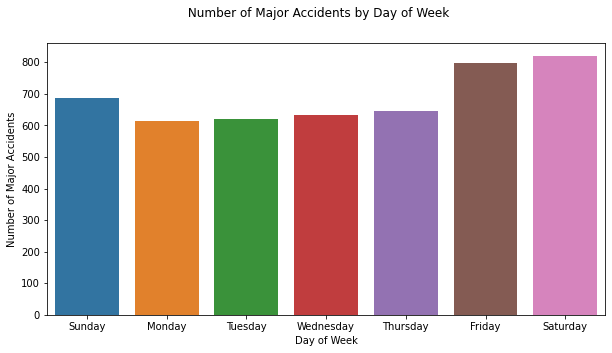

In [129]:
# import dependencies for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# plot major accidents by day of week
sns.countplot(x='day_of_week', data=major_accidents, order=days_of_week)
plt.gcf().set_size_inches(10,5)
plt.suptitle(' Number of Major Accidents by Day of Week')
plt.ylabel('Number of Major Accidents')
plt.xlabel('Day of Week')
plt.show()

Major accidents seem to happen most on Fridays and Saturdays. In our data, 798 major accidents happened on Fridays and 820 happened on Saturdays. Sundays seemed to also have more accidents than most weekdays with 687 major accidents in the data set.

There seems to be a pattern with accidents increasing gradually over week days. Mondays had 614 major accidents and this gradually increased to 645 major accidents on Thursdays. This then sharply increased to 798 major accidents, as pointed out above, on Fridays. 

## What time of day do major accidents happen the most?

In [130]:
# count number of major accidents by hour of day
major_times = major_accidents.resample('H', on='time')['accident_index'].count()
major_times

time
2022-04-18 00:00:00     94
2022-04-18 01:00:00     73
2022-04-18 02:00:00     54
2022-04-18 03:00:00     48
2022-04-18 04:00:00     33
2022-04-18 05:00:00     41
2022-04-18 06:00:00     65
2022-04-18 07:00:00    110
2022-04-18 08:00:00    197
2022-04-18 09:00:00    149
2022-04-18 10:00:00    211
2022-04-18 11:00:00    242
2022-04-18 12:00:00    272
2022-04-18 13:00:00    312
2022-04-18 14:00:00    372
2022-04-18 15:00:00    401
2022-04-18 16:00:00    433
2022-04-18 17:00:00    374
2022-04-18 18:00:00    341
2022-04-18 19:00:00    286
2022-04-18 20:00:00    232
2022-04-18 21:00:00    159
2022-04-18 22:00:00    181
2022-04-18 23:00:00    137
Freq: H, Name: accident_index, dtype: int64

In [131]:
# Extract hour of day from major_times index
hours = major_times.index.hour
hours

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23],
           dtype='int64', name='time')

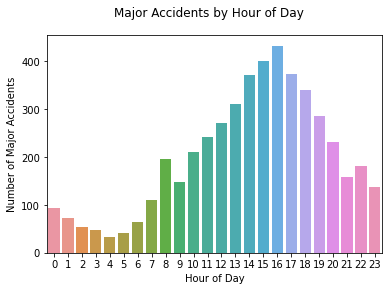

In [132]:
# plot major accidents by time of day
sns.barplot(x=hours, y=major_times)
plt.ylabel('Number of Major Accidents')
plt.xlabel('Hour of Day')
plt.suptitle('Major Accidents by Hour of Day')
plt.show()

Major accidents seemed to peak during the late afternoon/early evening hours. In this data set, the hour between 4PM and 5PM has the most major accidents at 433. In fact, the number of major accidents increases every hour--except for the hour between 8AM and 9AM--from the early morning hour between 4AM and 5AM at 33 major accidents until the peak between 4PM and 5PM. From 5PM there's a noticeable decrease every hour--except for the hour between 9PM and 10PM--until the low point between 4AM and 5AM.

## How about non-major accidents?
Is there a similar pattern for non-major accidents?

In [133]:
# Filter data for non-major accidents
non_major = accidents[accidents['major']==False]
non_major.head()

,accident_index,accident_year,accident_reference,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,...,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,major
0,2020010219808,2020,10219808,-0.254001,51.462262,3,1,1,04/02/2020,Tuesday,...,0,9,9,1,Unknown,9,0,0,1,False
1,2020010220496,2020,10220496,-0.139253,51.470327,3,1,2,27/04/2020,Monday,...,0,0,4,1,Fine no high winds,1,0,0,1,False
2,2020010228005,2020,10228005,-0.178719,51.529614,3,1,1,01/01/2020,Wednesday,...,0,0,0,4,Fine no high winds,2,0,0,1,False
3,2020010228006,2020,10228006,-0.001683,51.541210,2,1,1,01/01/2020,Wednesday,...,0,0,4,4,Fine no high winds,1,0,0,1,False
4,2020010228011,2020,10228011,-0.137592,51.515704,3,1,2,01/01/2020,Wednesday,...,0,0,0,4,Fine no high winds,1,0,0,1,False


In [134]:
# count number of non-major accidents by day of week
non_major.groupby('day_of_week')['day_of_week'].count()

day_of_week
Friday       14091
Monday       12158
Saturday     11516
Sunday        9628
Thursday     13411
Tuesday      12646
Wednesday    12932
Name: day_of_week, dtype: int64

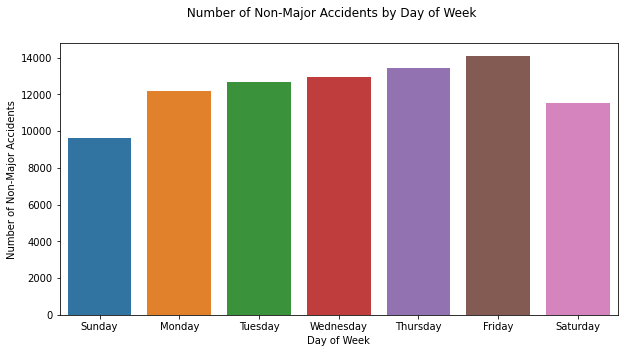

In [135]:
# create count plot of non-major accidents by day of week
sns.countplot(x='day_of_week', data=non_major, order=days_of_week)
plt.gcf().set_size_inches(10,5)
plt.suptitle(' Number of Non-Major Accidents by Day of Week')
plt.ylabel('Number of Non-Major Accidents')
plt.xlabel('Day of Week')
plt.show()

The number of non-major accidents shows a similar pattern to major accidents during weekdays in that there's an increase as the weekdays progress. There are 12,158 non-major accidents on Mondays and 14.091 on Fridays. However, unlike major accidents, non-major accidents were noticeably less common on Sundays and Saturdays with Sundays having 9,628 non-major accidents and Saturdays having 11,516.

In [136]:
# count number of non-major accidents by hour of day
non_major_times = non_major.resample('H', on='time')['accident_index'].count()
non_major_times

time
2022-04-18 00:00:00    1094
2022-04-18 01:00:00     842
2022-04-18 02:00:00     604
2022-04-18 03:00:00     518
2022-04-18 04:00:00     475
2022-04-18 05:00:00     814
2022-04-18 06:00:00    1765
2022-04-18 07:00:00    3626
2022-04-18 08:00:00    5070
2022-04-18 09:00:00    3768
2022-04-18 10:00:00    3962
2022-04-18 11:00:00    4570
2022-04-18 12:00:00    5123
2022-04-18 13:00:00    5429
2022-04-18 14:00:00    5873
2022-04-18 15:00:00    6960
2022-04-18 16:00:00    6948
2022-04-18 17:00:00    7439
2022-04-18 18:00:00    6277
2022-04-18 19:00:00    4762
2022-04-18 20:00:00    3483
2022-04-18 21:00:00    2947
2022-04-18 22:00:00    2374
2022-04-18 23:00:00    1659
Freq: H, Name: accident_index, dtype: int64

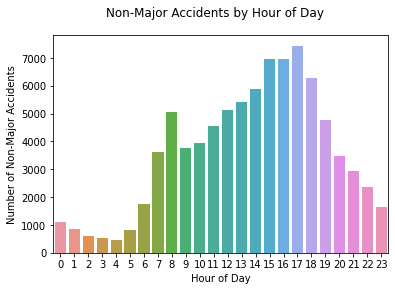

In [137]:
# plot major accidents by time of day
sns.barplot(x=hours, y=non_major_times)
plt.ylabel('Number of Non-Major Accidents')
plt.xlabel('Hour of Day')
plt.suptitle('Non-Major Accidents by Hour of Day')
plt.show()

The incidence of non-major accidents by time of day shows a similar pattern as major accidents. The hour between 4AM and 5AM had the fewest with 475 non-major accidents, then increasing from 5AM onwards, peaking at 7,439 accidents in the hour between 5PM and 6PM, then decreasing every hour until 4AM.

Because this pattern is similar for both non-major and major accidents, it could simply just be that accidents in general are most common during the late afternoon/early evening hours when most commuters might be driving home and least common in the very early morning hours when most people are still asleep.

## Do the number of cars matter?


In [138]:
# count the number of major accidents by the number of vehicles involved
accidents.groupby(['major','number_of_vehicles'])['number_of_vehicles'].count()

major  number_of_vehicles
False  1                     25154
       2                     54437
       3                      5336
       4                      1065
       5                       268
       6                        65
       7                        45
       8                         7
       9                         1
       10                        1
       11                        1
       12                        1
       13                        1
True   1                       576
       2                      2955
       3                       905
       4                       269
       5                        63
       6                        34
       7                         2
       8                         8
       9                         2
       10                        2
       11                        1
Name: number_of_vehicles, dtype: int64

## Is there a pattern based on weather conditions?

In [139]:
# count number of major accidents by weather condition
major_accidents.groupby('weather_conditions')['weather_conditions'].count()

weather_conditions
Fine + high winds          85
Fine no high winds       3723
Fog or mist                36
Other                     111
Raining + high winds      115
Raining no high winds     673
Snowing + high winds        3
Snowing no high winds      13
Unknown                    58
Name: weather_conditions, dtype: int64

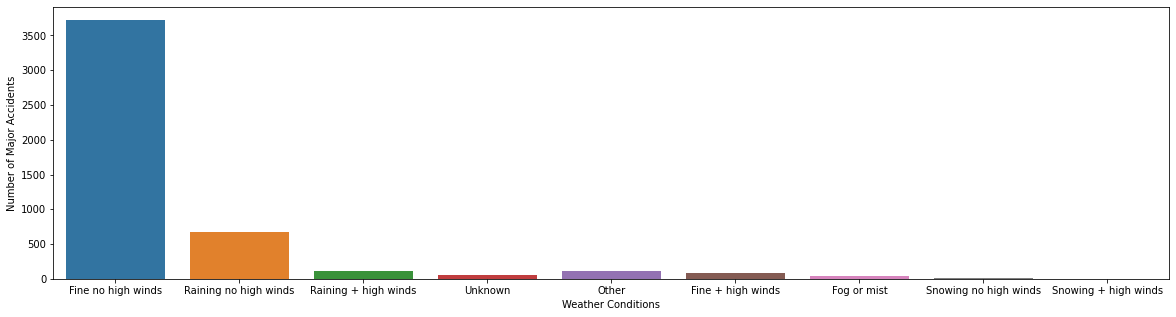

In [140]:
# plot number of major accidents by weather conditions
major_conditions=conditions.remove('Data missing or out of range')
sns.countplot(x='weather_conditions', data=major_accidents, order=major_conditions)
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Major Accidents')
plt.gcf().set_size_inches(20,5)

In [141]:
# count number of non-major accidents by weather condition
non_major.groupby('weather_conditions')['weather_conditions'].count()

weather_conditions
Data missing or out of range        1
Fine + high winds                1316
Fine no high winds              67006
Fog or mist                       474
Other                            2518
Raining + high winds             1550
Raining no high winds           10910
Snowing + high winds               70
Snowing no high winds             172
Unknown                          2365
Name: weather_conditions, dtype: int64

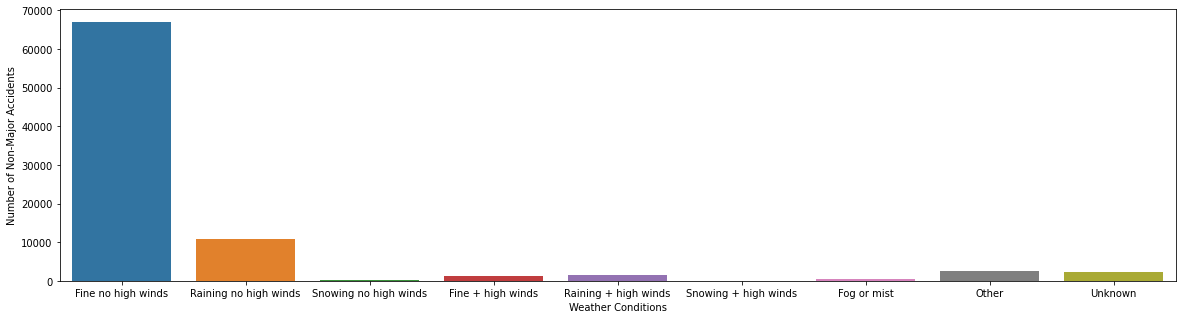

In [142]:
# plot number of non-major accidents by weather conditions
sns.countplot(x='weather_conditions', data=non_major, order=conditions)
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Non-Major Accidents')
plt.gcf().set_size_inches(20,5)

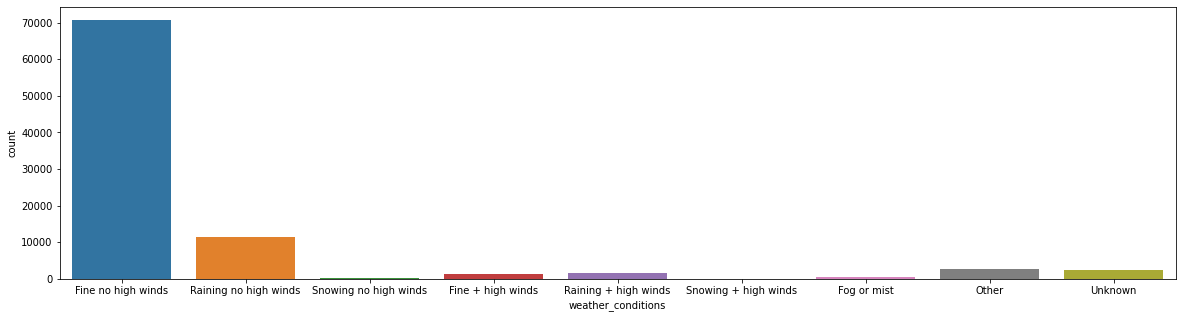

In [143]:
sns.countplot(x='weather_conditions', data=accidents, order=conditions)
plt.gcf().set_size_inches(20,5)

In [26]:
# filter data for non-fatal accidents
non_fatal = accidents[accidents['number_of_casualties']==0]
non_fatal.head()

,accident_index,accident_year,accident_reference,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,...,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,major
